# Statistical analysis of data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

## Introduction

#### Columns

`Iris.data` file consists of comma-separated data having following attributes:
* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)
* class (variety of iris flower)

In [41]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
columns = features + ['classname']

#### Reading the CSV data

In [42]:
dataset = pd.read_csv("iris-data/iris.data", names=columns)

In [43]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,classname
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Classes

In [5]:
classes = dataset["classname"].unique()

There is a total of 3 varieties of iris flowers (Setosa, Versicolor, Virginica) in a dataset as shown below:

In [6]:
for c in classes: print("> '{}'".format(c))

> 'Iris-setosa'
> 'Iris-versicolor'
> 'Iris-virginica'


In [7]:
for c in classes:
    instances = dataset.loc[dataset['classname'] == c].shape[0]
    print("Number of '{}' instances: {}".format(c, instances))

Number of 'Iris-setosa' instances: 50
Number of 'Iris-versicolor' instances: 50
Number of 'Iris-virginica' instances: 50


In [8]:
print(dataset.groupby('classname').size())

classname
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Summary

In [9]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Box and whiskers plots for each attribute

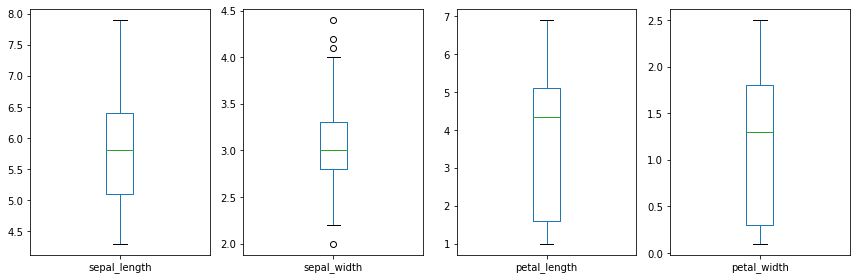

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(12,4))
dataset.plot(kind='box', subplots=True, ax=axes, sharex=False, sharey=False)
plt.tight_layout()
plt.show()

#### Scatter matrix for each pair of atributes

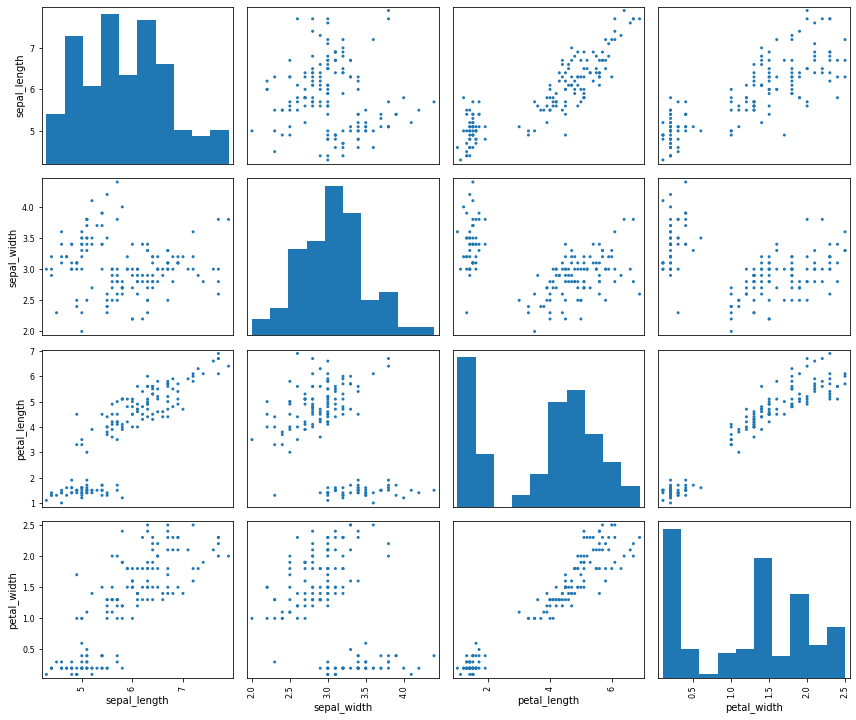

In [18]:
axes_array = pd.plotting.scatter_matrix(dataset, figsize=(12, 10), alpha=1.0, grid=True)
plt.tight_layout()
plt.show()

#### Correlation matrix

In [39]:
dataset.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


#### Kernel density estimates analysis

In [12]:
kdes = {}

for c in classes:
    filtr = (dataset['classname'] == c)
    subset = dataset.loc[filtr]
    kdes[c] = {}
    
    for feature in features:
        kdes[c][feature] = stats.gaussian_kde(np.asarray(subset[feature]))

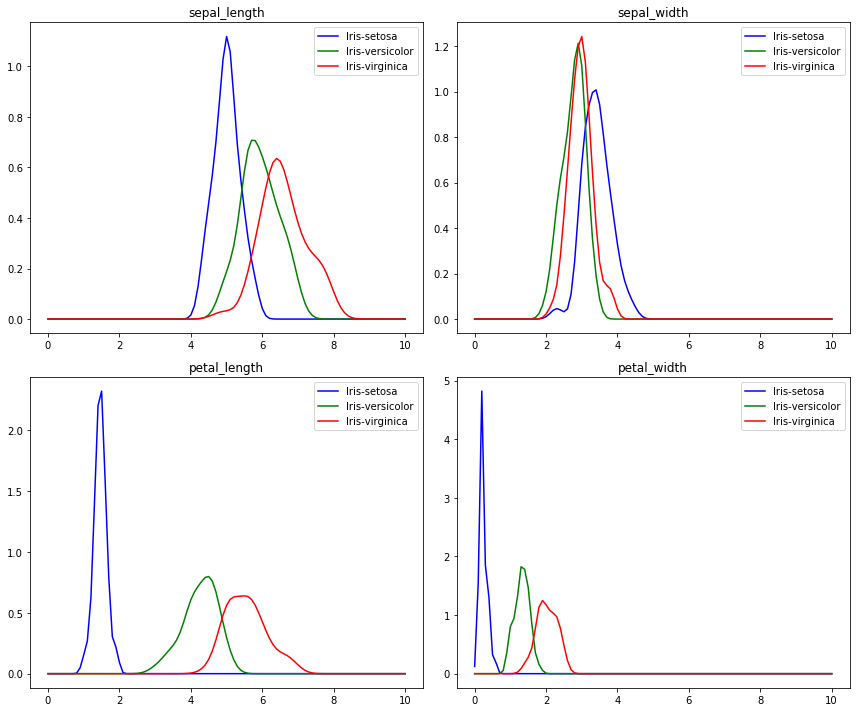

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
xs = np.linspace(0, 10, 101)
colors = ['b', 'g', 'r']

for i, feature in enumerate(features):
    axes[i//2][i%2].set_title(feature)
    for j, c in enumerate(classes):
        axes[i//2][i%2].plot(xs, kdes[c][feature].pdf(xs), colors[j])
    
    axes[i//2][i%2].legend(labels=classes, loc='upper right')

plt.tight_layout()
plt.show()